In [516]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


## Feature Engineering

In [517]:
features = df.drop(columns=['ID'])
features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,Graduation,Single,57091,0,0,0,464,5,64,7,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,Graduation,Married,67267,0,1,0,134,11,59,15,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,Graduation,Together,32474,1,1,0,10,0,1,0,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,Graduation,Single,21474,1,0,0,6,16,24,11,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


In [518]:
# Also encode Education and Marital_Status
features = pd.get_dummies(features, columns=['Education'], prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], prefix='Marital')
features = pd.get_dummies(features, columns=['Recency_Class'], prefix='Recency')
features = pd.get_dummies(features, columns=['Age_Class'], prefix='Age')
features = pd.get_dummies(features, columns=['Total_Spent_Class'], prefix='Total_Spent')
features = pd.get_dummies(features, columns=['Total_Purchases_Class'], prefix='Total_Purchases')
features = pd.get_dummies(features, columns=['Total_Visits_Class'], prefix='Total_Visits')
features = pd.get_dummies(features, columns=['Family_Classification'], prefix='Family_Classification')
features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchases_5-9,Total_Visits_0-19,Total_Visits_100-119+,Total_Visits_20-39,Total_Visits_40-59,Total_Visits_60-79,Total_Visits_80-99,Family_Classification_Childless,Family_Classification_Medium-Children,Family_Classification_Single-Child
0,84835,0,0,0,189,104,379,111,189,218,...,False,True,False,False,False,False,False,True,False,False
1,57091,0,0,0,464,5,64,7,0,37,...,False,True,False,False,False,False,False,True,False,False
2,67267,0,1,0,134,11,59,15,2,30,...,False,True,False,False,False,False,False,False,False,True
3,32474,1,1,0,10,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,21474,1,0,0,6,16,24,11,0,34,...,True,True,False,False,False,False,False,False,False,True


In [519]:
print(list(features.columns))


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Customer_Enrollment', 'Household', 'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 'Total_Spent_Light-Spender', 'T

In [520]:
features.reset_index(inplace=True)

## Logistic Regression

In [521]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                                                            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                            'NumStorePurchases', 'NumWebVisitsMonth', 
                                                            'Complain', 'Age', 'Customer_Enrollment', 'Household', 
                                                            'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 
                                                            'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 
                                                            'Education_Graduation', 'Education_Master', 'Education_PhD', 
                                                            'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 
                                                            'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 
                                                            'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 
                                                            'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 
                                                            'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 
                                                            'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 
                                                            'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 
                                                            'Total_Spent_Light-Spender', 'Total_Spent_Very-Heavy-Spender', 
                                                            'Total_Purchases_0-4', 'Total_Purchases_10-14', 'Total_Purchases_15-19', 
                                                            'Total_Purchases_20-24', 'Total_Purchases_25-29', 'Total_Purchases_30-34', 
                                                            'Total_Purchases_35-39+', 'Total_Purchases_5-9', 'Total_Visits_0-19', 
                                                            'Total_Visits_100-119+', 'Total_Visits_20-39', 'Total_Visits_40-59', 
                                                            'Total_Visits_60-79', 'Total_Visits_80-99', 'Family_Classification_Childless', 
                                                            'Family_Classification_Medium-Children', 'Family_Classification_Single-Child']
]
# X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [522]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [526]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [527]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## Hyperparameter Optimization

In [536]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('lg', LogisticRegression(random_state=42))
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 'auto', 'minority', 'not minority'],  # Adjust sampling strategy
    'smote__k_neighbors': [3, 5, 7, 9],  # Adjust number of neighbors for SMOTE
    'lg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter for Logistic Regression
    'lg__solver': ['liblinear', 'lbfgs']  # Solver for Logistic Regression
}
grid_search = GridSearchCV(pipeline,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.8s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_stra

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('lg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lg__solver': ['liblinear', 'lbfgs'],
                         'smote__k_neighbors': [3, 5, 7, 9],
                         'smote__sampling_strategy': ['not majority', 'all',
                                                      'auto', 'minority',
                                                      'not minority']},
             scoring='precision', verbose=2)

In [539]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'lg__C': 1, 'lg__solver': 'liblinear', 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not majority'}


In [542]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define SMOTE with the best parameters
smote = SMOTE(sampling_strategy=best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

# Define Logistic Regression with the best parameters
lg = LogisticRegression(C=best_params['lg__C'], 
                        solver=best_params['lg__solver'], 
                        random_state=42)

# Create a pipeline with SMOTE and Logistic Regression
pipeline = Pipeline([('smote', smote), ('lg', lg)])

# Fit the pipeline to the scaled training data
pipeline.fit(X_train_scaled, y_train)

# Predictions on training and test set
lg_pred_train = pipeline.predict(X_train_scaled)
lg_pred_test = pipeline.predict(X_test_scaled)

# Calculate evaluation metrics
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)

# Print evaluation metrics
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

# Calculate precision scores for training and test set
lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)

# Check for overfitting
print('Training set precision: {:.4f}'.format(lg_prec_train))
print('Test set precision: {:.4f}'.format(lg_prec_test))


Logistic Regression Accuracy: 0.8891
Logistic Regression Precision: 0.6481
Logistic Regression Recall: 0.4375
Logistic Regression F1: 0.5224
Logistic Regression AUC: 0.6996
Training set precision: 0.9574
Test set precision: 0.6481


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train_scaled, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) # lower CV score = does not result in improved performance

Cross-validation scores:[1.         0.92045455 0.92045455 0.95857988 0.95294118]
Average cross-validation score: 0.9505


Confusion matrix

 [[784  43]
 [ 80  55]]

True Positives(TP) =  784

True Negatives(TN) =  55

False Positives(FP) =  43

False Negatives(FN) =  80


<Axes: >

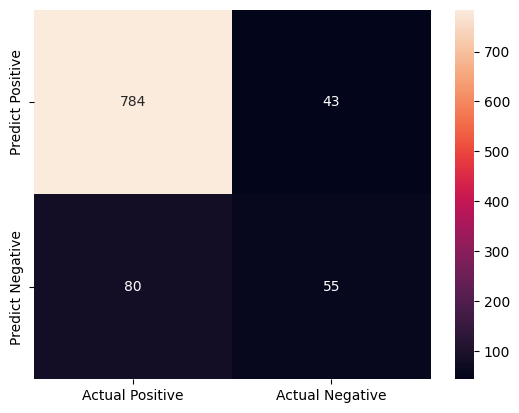

In [ ]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

Naive Bayes Accuracy: 0.7391
Naive Bayes Precision: 0.2698
Naive Bayes Recall: 0.5037
Naive Bayes F1: 0.3514
Naive Bayes AUC: 0.6406
Training set score: 0.7381
Test set score: 0.2698


In [ ]:
scores = cross_val_score(nb, X_train, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

Cross-validation scores:[0.73228346 0.73287671 0.76100629 0.69230769 0.73880597]
Average cross-validation score: 0.7315


Confusion matrix

 [[643 184]
 [ 67  68]]

True Positives(TP) =  643

True Negatives(TN) =  68

False Positives(FP) =  184

False Negatives(FN) =  67


<Axes: >

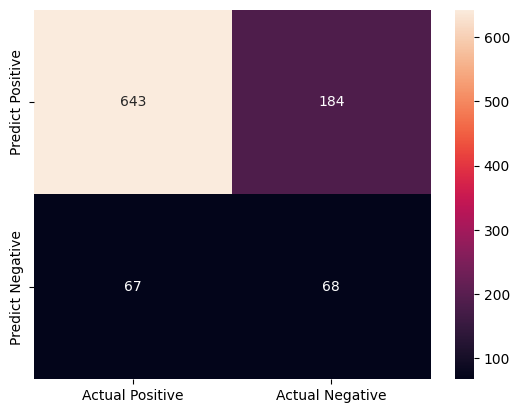

In [ ]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

## HyperParameter Optimization

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'ccp_alpha': [0.001, 0.01, 0.1, 1]  # Cost Complexity Pruning parameter
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=0)
grid_search.fit(X_train, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.8757


Parameters that give the best results : 

 {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       min_samples_split=10)
GridSearch CV score on test set: 0.3111


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dt = grid_search.best_estimator_
dt.fit(X_train,y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)
print("Decision Trees Accuracy: %.4f" % dt_acc)
print("Decision Trees Precision: %.4f" % dt_prec)
print("Decision Trees Recall: %.4f" % dt_rec)
print("Decision Trees F1: %.4f" % dt_f1)
print("Decision Trees AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(dt_prec_train))
print('Test set score: {:.4f}'.format(dt_prec_test))

Decision Trees Accuracy: 0.7952
Decision Trees Precision: 0.3013
Decision Trees Recall: 0.3481
Decision Trees F1: 0.3230
Decision Trees AUC: 0.6082
Training set score: 0.9838
Test set score: 0.3013


Confusion matrix

 [[718 109]
 [ 88  47]]

True Positives(TP) =  718

True Negatives(TN) =  47

False Positives(FP) =  109

False Negatives(FN) =  88


<Axes: >

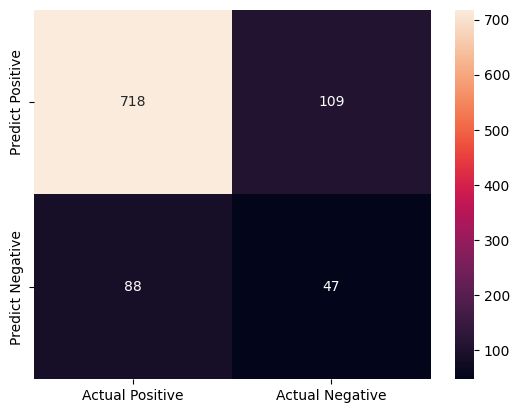

In [ ]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## HyperParameter Optimization

In [ ]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}
knn = KNeighborsClassifier()
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn,
                               param_grid=parameters,
                               scoring='precision',
                               cv=5,
                               verbose=0)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.9276


Parameters that give the best results : 

 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(metric='manhattan', n_neighbors=3)
GridSearch CV score on test set: 0.3814


In [ ]:
knn = grid_search.best_estimator_
knn.fit(X_train_scaled,y_train)
knn_pred_train = knn.predict(X_train_scaled)
knn_pred_test = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)
print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(knn_prec_train))
print('Test set score: {:.4f}'.format(knn_prec_test))

k-Nearest Neighbors Accuracy: 0.8306
k-Nearest Neighbors Precision: 0.3814
k-Nearest Neighbors Recall: 0.3333
k-Nearest Neighbors F1: 0.3557
k-Nearest Neighbors AUC: 0.6225
Training set score: 0.9614
Test set score: 0.3814


Confusion matrix

 [[754  73]
 [ 90  45]]

True Positives(TP) =  754

True Negatives(TN) =  45

False Positives(FP) =  73

False Negatives(FN) =  90


<Axes: >

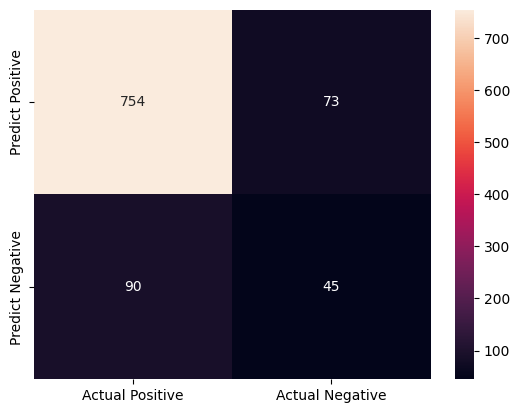

In [ ]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

## Hyperparameter Optimization

In [ ]:
from sklearn.metrics import make_scorer
# param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]
# grid_search = GridSearchCV(estimator = svm,  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)
# grid_search.fit(X_train, y_train)



# scorer = make_scorer(precision_score, average='binary', zero_division=0)
# param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}

# # param_grid = {
# #     'C': [0.1, 1, 10, 100], 
# #     'gamma': [1, 0.1, 0.01, 0.001], 
# #     'kernel': ['linear', 'rbf'] 
# # }
# grid_search = GridSearchCV(estimator=svm, scoring=scorer, param_grid=param_grid, cv=5)

# grid_search.fit(X_train_scaled, y_train)

scorer = make_scorer(precision_score, average='binary', zero_division=0)
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
# Initialize SVM classifier
svm = SVC()
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='precision',
             scoring={'precision': make_scorer(precision_score, response_method='predict')},
             verbose=2)

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.9868


Parameters that give the best results : 

 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=1)


GridSearch CV score on test set: 0.0000


In [ ]:
svm = grid_search.best_estimator_
svm.fit(X_train_scaled,y_train)
svm_pred_train = svm.predict(X_train_scaled)
svm_pred_test = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)
print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(svm_prec_train))
print('Test set score: {:.4f}'.format(svm_prec_test))

Support Vector Machines Accuracy: 0.8524
Support Vector Machines Precision: 0.0000
Support Vector Machines Recall: 0.0000
Support Vector Machines F1: 0.0000
Support Vector Machines AUC: 0.4958
Training set score: 1.0000
Test set score: 0.0000


Confusion matrix

 [[820   7]
 [135   0]]

True Positives(TP) =  820

True Negatives(TN) =  0

False Positives(FP) =  7

False Negatives(FN) =  135


<Axes: >

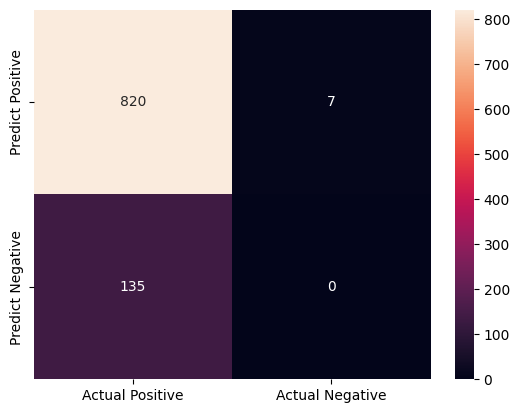

In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Summary of Results

In [ ]:
from prettytable import PrettyTable
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Precision Training Score', 'Precision Test Score']

logistic_reg = [lg_acc, lg_prec, lg_rec, lg_f1, lg_auc, lg_prec_train, lg_prec_test]
logistic_reg = [f'{value:.4f}' if isinstance(value, float) else value for value in logistic_reg]

naive_bayes = [nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, nb_prec_train, nb_prec_test]
naive_bayes = [f'{value:.4f}' if isinstance(value, float) else value for value in naive_bayes]

decision_tree = [dt_acc, dt_prec, dt_rec, dt_f1, dt_auc, dt_prec_train, dt_prec_test]
decision_tree = [f'{value:.4f}' if isinstance(value, float) else value for value in decision_tree]

k_nearest = [knn_acc, knn_prec, knn_rec, knn_f1, knn_auc, knn_prec_train, knn_prec_test] 
k_nearest = [f'{value:.4f}' if isinstance(value, float) else value for value in k_nearest]

support_vector = [svm_acc, svm_prec, svm_rec, svm_f1, svm_auc, svm_prec_train, svm_prec_test]
support_vector = [f'{value:.4f}' if isinstance(value, float) else value for value in support_vector]

# Create a list of tuples containing variable names and their values
variables = [
    ('Logistic Regression', logistic_reg),
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('k-Nearest Neighbors', k_nearest),
    ('Support Vector Machines', support_vector)
]
table = PrettyTable()
# Display variables in a tabular format
table.add_column('Algorithm', labels)
table.add_column('Logistic Regression', logistic_reg)
table.add_column('Naive Bayes', naive_bayes)
table.add_column('Decision Tree', decision_tree)
table.add_column('k-Nearest Neighbors', k_nearest)
table.add_column('Support Vector Machines', support_vector)
table.align = 'l'
print(table)

+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Algorithm                | Logistic Regression | Naive Bayes | Decision Tree | k-Nearest Neighbors | Support Vector Machines |
+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Accuracy                 | 0.8721              | 0.7391      | 0.7952        | 0.8306              | 0.8524                  |
| Precision                | 0.5612              | 0.2698      | 0.3013        | 0.3814              | 0.0000                  |
| Recall                   | 0.4074              | 0.5037      | 0.3481        | 0.3333              | 0.0000                  |
| F1                       | 0.4721              | 0.3514      | 0.3230        | 0.3557              | 0.0000                  |
| AUC                      | 0.6777              | 0.6406      | 0.6082        | 0.6225          